In [1]:
import tensorflow as tf
import numpy as np

H:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<font size=4 face='黑体'>定义会话，启动默认图，创建节点op

In [2]:
#创建常量op
m1 = tf.constant([[3,3]])
m2 = tf.constant([[2],[3]])
#创建矩阵乘法op，传入m1,m2
product = tf.matmul(m1,m2)

In [3]:
#定义一个会话，启动默认图
with tf.Session() as sess:
    result = sess.run(product)
    print(result)

[[15]]


<font size=4 faec='黑体'>变量

In [4]:
x = tf.Variable([1,2])
a = tf.constant([3,3])
#减法op
sub = tf.subtract(x,a)
#加法op
add = tf.add(x,sub)
#初始化全局变量
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(sub))
    print(sess.run(add))

[-2 -1]
[-1  1]


In [5]:
#创建循环

#初始化变量
state = tf.Variable(0,name='counter')
#创建op，使state加1
new_value = tf.add(state,1)
#创建赋值op(将后面的值赋给前面)
update = tf.assign(state,new_value)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(state))
    for _ in range(5):
        sess.run(update)
        print(sess.run(state))

0
1
2
3
4
5


<font size=4 face='黑体'>Fetch & Feed

In [6]:
#Fetch：同时运行多个op
input1 = tf.constant(3)
input2 = tf.constant(2)
input3 = tf.constant(5)

add = tf.add(input2,input3)
mul = tf.multiply(input1,add)

with tf.Session() as sess:
    result = sess.run([mul,add])
    print(result)

[21, 7]


In [7]:
#Feed:运行op时，在进行赋值

#创建占位符
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1,input2)

with tf.Session() as sess:
    #feed的数据以字典的形式传入
    print(sess.run(output,feed_dict={input1:[8.],input2:[2.]}))

[16.]


<font size=4 face='黑体'>简单示例

In [8]:
#简单的线性回归
x_data = np.random.rand(100)
y_data = x_data * 0.1 + 0.2

#构造线性模型
b = tf.Variable(1.5)
k = tf.Variable(0.5)
y = k*x_data + b

#均方误差损失函数
loss = tf.reduce_mean(tf.square(y_data - y))
#定义梯度下降法优化器
optimizer = tf.train.GradientDescentOptimizer(0.2)  #0.2为学习率
#最小化损失函数
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(1001):
        sess.run(train)
        if step%100 == 0:
            print(step,sess.run([k,b]))

0 [0.17781974, 0.8979078]
100 [0.08294952, 0.20935313]
200 [0.09876008, 0.20068017]
300 [0.099909835, 0.20004946]
400 [0.09999345, 0.2000036]
500 [0.09999951, 0.20000027]
600 [0.09999979, 0.20000012]
700 [0.09999979, 0.20000012]
800 [0.09999979, 0.20000012]
900 [0.09999979, 0.20000012]
1000 [0.09999979, 0.20000012]


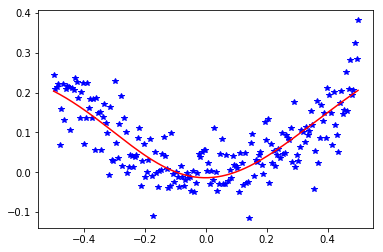

In [12]:
#简单的2层神经网络进行回归
import matplotlib.pyplot as plt

x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data) + noise

x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

#定义隐藏层
W1 = tf.Variable(tf.random_normal([1,10]))
b1 = tf.Variable(tf.zeros([1,10]))
a1 = tf.matmul(x,W1) + b1
L1 = tf.nn.tanh(a1)

#定义输出层
W2 = tf.Variable(tf.random_normal([10,1]))
b2 = tf.Variable(tf.zeros([1,1]))
a2 = tf.matmul(L1,W2) + b2
prediction = tf.nn.tanh(a2)

#损失函数
loss = tf.reduce_mean(tf.square(y - prediction))
#梯度下降法训练
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
    
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    
    plt.plot(x_data,y_data,'b*')
    plt.plot(x_data,prediction_value,'r-')
    plt.show()

<font size=4 face='黑体'>简单版本的MNIST数据集分类

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
#载入数据集
mnist = input_data.read_data_sets(r'F:\data\mnist_data\MNIST_data',one_hot=True)

Extracting F:\data\mnist_data\MNIST_data\train-images-idx3-ubyte.gz
Extracting F:\data\mnist_data\MNIST_data\train-labels-idx1-ubyte.gz
Extracting F:\data\mnist_data\MNIST_data\t10k-images-idx3-ubyte.gz
Extracting F:\data\mnist_data\MNIST_data\t10k-labels-idx1-ubyte.gz


In [5]:
batch_size = 100
n_batch = mnist.train.num_examples // batch_size

x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

W1 = tf.Variable(tf.random_normal([784,100]) * 0.01)
b1 = tf.Variable(tf.zeros([100]))
a1 = tf.matmul(x,W1) + b1
L1 = tf.nn.relu(a1)

W2 = tf.Variable(tf.random_normal([100,10]) * 0.01)
b2 = tf.Variable(tf.zeros([10]))
a2 = tf.matmul(L1,W2) + b2
prediction = tf.nn.softmax(a2)

#交叉熵损失函数
#cross_entropy = -tf.reduce_mean(y*tf.log(tf.clip_by_value(prediction,1e-10,1.0)))
#tf.clip_by_value(v,a,b)表示把v限制在a~b的范围内
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=a2))
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(cross_entropy)

init = tf.global_variables_initializer()

#求准确率
correct = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))  #equal：判断是否相等并返回bool型数组
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32)) 

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21):
        for batch in range(n_batch):
            batch_x,batch_y = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_x,y:batch_y})
            
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print('Iter'+str(epoch)+'Testing  Accuracy:'+str(acc))

Iter0Testing  Accuracy:0.9251
Iter1Testing  Accuracy:0.9437
Iter2Testing  Accuracy:0.9556
Iter3Testing  Accuracy:0.9632
Iter4Testing  Accuracy:0.9658
Iter5Testing  Accuracy:0.9713
Iter6Testing  Accuracy:0.9717
Iter7Testing  Accuracy:0.9703
Iter8Testing  Accuracy:0.9722
Iter9Testing  Accuracy:0.9727
Iter10Testing  Accuracy:0.9739
Iter11Testing  Accuracy:0.9755
Iter12Testing  Accuracy:0.9763
Iter13Testing  Accuracy:0.9763
Iter14Testing  Accuracy:0.975
Iter15Testing  Accuracy:0.9752
Iter16Testing  Accuracy:0.9762
Iter17Testing  Accuracy:0.9762
Iter18Testing  Accuracy:0.9766
Iter19Testing  Accuracy:0.9773
Iter20Testing  Accuracy:0.9771


<font size=4 face='黑体'>dropout:防止过拟合

In [8]:
batch_size = 100
n_batch = mnist.train.num_examples // batch_size

x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])
keep_prob = tf.placeholder(tf.float32)

#创建一个复杂的神经网络，如果不使用dropout会发生过拟合
W1 = tf.Variable(tf.truncated_normal([784,1000],stddev=0.1))
b1 = tf.Variable(tf.zeros([1000]) + 0.1)
a1 = tf.matmul(x,W1) + b1
L1 = tf.nn.relu(a1)
L1_drop = tf.nn.dropout(L1,keep_prob)

W2 = tf.Variable(tf.truncated_normal([1000,500],stddev=0.1))
b2 = tf.Variable(tf.zeros([500]) + 0.1)
a2 = tf.matmul(L1_drop,W2) + b2
L2 = tf.nn.relu(a2)
L2_drop = tf.nn.dropout(L2,keep_prob)

W3 = tf.Variable(tf.truncated_normal([500,10],stddev=0.1))
b3 = tf.Variable(tf.zeros([10]) + 0.1)
a3 = tf.matmul(L2_drop,W3) + b3
prediction = tf.nn.softmax(a3)

#交叉熵损失函数
#cross_entropy = -tf.reduce_mean(y*tf.log(tf.clip_by_value(prediction,1e-10,1.0)))
#tf.clip_by_value(v,a,b)表示把v限制在a~b的范围内
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=a3))
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(cross_entropy)

init = tf.global_variables_initializer()

#求准确率
correct = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))  #equal：判断是否相等并返回bool型数组
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32)) 

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21):
        for batch in range(n_batch):
            batch_x,batch_y = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_x,y:batch_y,keep_prob:0.3})
            
        test_acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_prob:1.0})
        train_acc = sess.run(accuracy,feed_dict={x:mnist.train.images,y:mnist.train.labels,keep_prob:1.0})
        print('Iter'+str(epoch)+' Testing  Accuracy:'+str(test_acc)+' Train Accuracy:'+str(train_acc))

Iter0 Testing  Accuracy:0.9286 Train Accuracy:0.92734545
Iter1 Testing  Accuracy:0.9471 Train Accuracy:0.9459818
Iter2 Testing  Accuracy:0.9521 Train Accuracy:0.95583636
Iter3 Testing  Accuracy:0.9557 Train Accuracy:0.9599636
Iter4 Testing  Accuracy:0.9598 Train Accuracy:0.96509093
Iter5 Testing  Accuracy:0.9612 Train Accuracy:0.96772724
Iter6 Testing  Accuracy:0.9647 Train Accuracy:0.9709091
Iter7 Testing  Accuracy:0.9638 Train Accuracy:0.97261816
Iter8 Testing  Accuracy:0.9673 Train Accuracy:0.97458184
Iter9 Testing  Accuracy:0.9664 Train Accuracy:0.9749454
Iter10 Testing  Accuracy:0.9677 Train Accuracy:0.9754909
Iter11 Testing  Accuracy:0.9708 Train Accuracy:0.9784182
Iter12 Testing  Accuracy:0.9701 Train Accuracy:0.97925454
Iter13 Testing  Accuracy:0.9716 Train Accuracy:0.9802182
Iter14 Testing  Accuracy:0.9698 Train Accuracy:0.9804364
Iter15 Testing  Accuracy:0.9705 Train Accuracy:0.98087275
Iter16 Testing  Accuracy:0.9725 Train Accuracy:0.98303634
Iter17 Testing  Accuracy:0.9744 

<font size=4 face='黑体'>不同的optimizer

In [20]:
batch_size = 100
n_batch = mnist.train.num_examples // batch_size

x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

W1 = tf.Variable(tf.truncated_normal([784,500],stddev=0.1))
b1 = tf.Variable(tf.zeros([500]) + 0.1)
a1 = tf.matmul(x,W1) + b1
L1 = tf.nn.relu(a1)

W2 = tf.Variable(tf.truncated_normal([500,100],stddev=0.1))
b2 = tf.Variable(tf.zeros([100]) + 0.1)
a2 = tf.matmul(L1,W2) + b2
L2 = tf.nn.relu(a2)

W3 = tf.Variable(tf.truncated_normal([100,10],stddev=0.1))
b3 = tf.Variable(tf.zeros([10]) + 0.1)
a3 = tf.matmul(L2,W3) + b3
prediction = tf.nn.softmax(a3)

lr = tf.Variable(0.001)

#交叉熵损失函数
#cross_entropy = -tf.reduce_mean(y*tf.log(tf.clip_by_value(prediction,1e-10,1.0)))
#tf.clip_by_value(v,a,b)表示把v限制在a~b的范围内
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=a3))
#Adam优化器
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)
#Adagrad优化器
#train_step = tf.train.GradientDescentOptimizer(0.2).minimize(cross_entropy)
init = tf.global_variables_initializer()

#求准确率
correct = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))  #equal：判断是否相等并返回bool型数组
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32)) 

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(31):
        sess.run(tf.assign(lr,0.001*(0.95 ** epoch)))
        for batch in range(n_batch):
            batch_x,batch_y = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_x,y:batch_y})
            
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print('Iter'+str(epoch)+'Testing  Accuracy:'+str(acc))

Iter0Testing  Accuracy:0.9649
Iter1Testing  Accuracy:0.9727
Iter2Testing  Accuracy:0.975
Iter3Testing  Accuracy:0.9767
Iter4Testing  Accuracy:0.9802
Iter5Testing  Accuracy:0.9769
Iter6Testing  Accuracy:0.9788
Iter7Testing  Accuracy:0.9773
Iter8Testing  Accuracy:0.9793
Iter9Testing  Accuracy:0.9808
Iter10Testing  Accuracy:0.9806
Iter11Testing  Accuracy:0.9809
Iter12Testing  Accuracy:0.9808
Iter13Testing  Accuracy:0.9781
Iter14Testing  Accuracy:0.9807
Iter15Testing  Accuracy:0.9807
Iter16Testing  Accuracy:0.9823
Iter17Testing  Accuracy:0.9827
Iter18Testing  Accuracy:0.983
Iter19Testing  Accuracy:0.9831
Iter20Testing  Accuracy:0.983
Iter21Testing  Accuracy:0.9831
Iter22Testing  Accuracy:0.9834
Iter23Testing  Accuracy:0.9834
Iter24Testing  Accuracy:0.9834
Iter25Testing  Accuracy:0.9833
Iter26Testing  Accuracy:0.9832
Iter27Testing  Accuracy:0.9815
Iter28Testing  Accuracy:0.9826
Iter29Testing  Accuracy:0.9825
Iter30Testing  Accuracy:0.9829


<font size=4 face='黑体'>Saver & restore

In [5]:
batch_size = 100
n_batch = mnist.train.num_examples // batch_size

x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
a = tf.matmul(x,W) + b
prediction = tf.nn.softmax(a)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=a))
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(cross_entropy)

init = tf.global_variables_initializer()

#求准确率
correct = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))  #equal：判断是否相等并返回bool型数组
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32)) 

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(11):
        for batch in range(n_batch):
            batch_x,batch_y = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_x,y:batch_y})
            
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print('Iter'+str(epoch)+'Testing  Accuracy:'+str(acc))
        
    saver.save(sess,'modelsaver/mnist8-2/test.ckpt')

Iter0Testing  Accuracy:0.9069
Iter1Testing  Accuracy:0.9156
Iter2Testing  Accuracy:0.9185
Iter3Testing  Accuracy:0.9218
Iter4Testing  Accuracy:0.921
Iter5Testing  Accuracy:0.9219
Iter6Testing  Accuracy:0.9228
Iter7Testing  Accuracy:0.921
Iter8Testing  Accuracy:0.9238
Iter9Testing  Accuracy:0.9227
Iter10Testing  Accuracy:0.9216


In [4]:
batch_size = 100
n_batch = mnist.train.num_examples // batch_size

x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
a = tf.matmul(x,W) + b
prediction = tf.nn.softmax(a)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=a))
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(cross_entropy)

init = tf.global_variables_initializer()

#求准确率
correct = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))  #equal：判断是否相等并返回bool型数组
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32)) 

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    acc1 = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
    saver.restore(sess,'modelsaver/mnist8-2/test.ckpt')
    acc2 = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
    print('Init Accuracy:'+str(acc1))
    print('Restore Accuracy:'+str(acc2))

INFO:tensorflow:Restoring parameters from modelsaver/mnist8-2/test.ckpt
Init Accuracy:0.098
Restore Accuracy:0.098
